## Import Dependences

In [2]:
import torch 
from torch import nn # contains all pytoch building blocks for neural network 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

## Load Data

### Create sample data 

In [3]:
# create known parameters 
weight = .7
bias = .3

# create data samples  
X = torch.arange(0, 1, .02).unsqueeze(1) # start, end, step -> then add extra dimention
y = weight * X + bias

In [4]:
X[:5], X.shape, y[:5], y.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 torch.Size([50, 1]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]),
 torch.Size([50, 1]))

### Split data to train and test data 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42) # shuffle them randomly

In [6]:
len(X_train), len(X_test)

(40, 10)

### Visualize Data Points

In [7]:
def plot_predctions(traning_data=X_train,
                    traning_label=y_train,
                    test_data=X_test,
                    test_label=y_test, 
                    predctions=None):


    # create my plot figure 
    plt.figure(figsize=(5,5))
    
    # plot trainig data in bule 
    plt.scatter(traning_data, traning_label, c='b', s=6, label='Training data') 
                
    # plot testing data in green 
    plt.scatter(test_data, test_label, c='g', s=6, label='Testing data') 
    
    if predctions is not None:            
        # plot predictions data in red 
        plt.scatter(test_data, predctions, c='r', s=6, label='Predictions')

    plt.legend()
    plt.show()

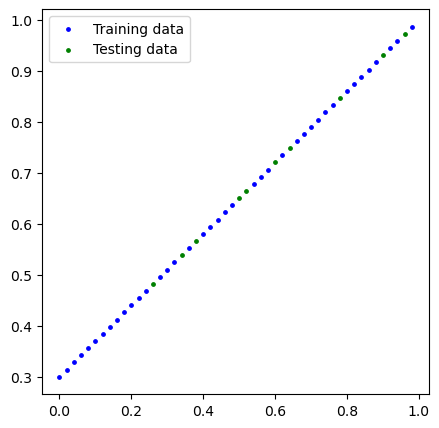

In [8]:
plot_predctions()

## Model 

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad=True, 
                                                dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [113]:
torch.manual_seed(7)
lr_model_0 = LinearRegressionModel()

In [114]:
list(lr_model_0.parameters())

[Parameter containing:
 tensor([-0.1468], requires_grad=True),
 Parameter containing:
 tensor([0.7861], requires_grad=True)]

In [99]:
lr_model_0.state_dict()

OrderedDict([('weights', tensor([-0.1468])), ('bias', tensor([0.7861]))])

In [13]:
with torch.inference_mode():
    y_pred = lr_model_0.forward(X_test)
y_pred

tensor([[0.7480],
        [0.6716],
        [0.6981],
        [0.6540],
        [0.7362],
        [0.6452],
        [0.7098],
        [0.7127],
        [0.6922],
        [0.7304]])

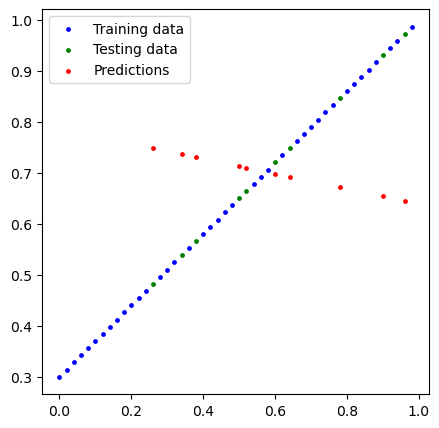

In [14]:
plot_predctions(predctions=y_pred)

## Model Training 
#### To train model you need just to steps 
- Loss function -> To compute the loss between actual and predicted value nn.loass_function
- optimer ->  To update the parameters which decrease the loss torch.optim

In [115]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(lr_model_0.parameters(), lr=.01)

### Training Loop

In [116]:
epochs = 81
epoch_nums = []
loss_values = []
loss_test_values = []

for epoch in range(epochs):
    # set model in trainig mode
    lr_model_0.train()
    # compute y_pred 
    y_pred = lr_model_0(X_train)
    # compute loss 
    loss = loss_fn(y_train, y_pred)
    # zero grad 
    optimizer.zero_grad()
    # compute back propagation
    loss.backward()
    # take a step 
    optimizer.step()
    
    # test model in evalution data
    lr_model_0.eval()
    with torch.inference_mode():
        y_pred = lr_model_0(X_test)
        test_loss = loss_fn(y_test, y_pred)

    if epoch % 10 == 0:
        epoch_nums.append(epoch)
        loss_values.append(loss)
        loss_test_values.append(test_loss)
        print(f"epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss} | weihts: {lr_model_0.state_dict()}")
    

epoch: 0 | Loss: 0.2322920858860016 | Test Loss: 0.15731747448444366 | weihts: OrderedDict({'weights': tensor([-0.1368]), 'bias': tensor([0.7761])})
epoch: 10 | Loss: 0.19895993173122406 | Test Loss: 0.1386106312274933 | weihts: OrderedDict({'weights': tensor([-0.0356]), 'bias': tensor([0.6809])})
epoch: 20 | Loss: 0.1684493124485016 | Test Loss: 0.12920746207237244 | weihts: OrderedDict({'weights': tensor([0.0680]), 'bias': tensor([0.5964])})
epoch: 30 | Loss: 0.14006328582763672 | Test Loss: 0.10970737785100937 | weihts: OrderedDict({'weights': tensor([0.1753]), 'bias': tensor([0.5399])})
epoch: 40 | Loss: 0.11219464242458344 | Test Loss: 0.08389230817556381 | weihts: OrderedDict({'weights': tensor([0.2829]), 'bias': tensor([0.4990])})
epoch: 50 | Loss: 0.08455847203731537 | Test Loss: 0.06351175904273987 | weihts: OrderedDict({'weights': tensor([0.3879]), 'bias': tensor([0.4471])})
epoch: 60 | Loss: 0.057027436792850494 | Test Loss: 0.04289054870605469 | weihts: OrderedDict({'weight

In [109]:
print(loss)

tensor(0.0024, grad_fn=<MeanBackward0>)


In [110]:
"""before training 

[Parameter containing:
 tensor([-0.1468], requires_grad=True), -> .7
 Parameter containing:
 tensor([0.7861], requires_grad=True)] -> .3
 OrderedDict([('weights', tensor([0.6721])), ('bias', tensor([0.2951]))]) after 100 epoch

"""

lr_model_0.state_dict()

OrderedDict([('weights', tensor([0.7012])), ('bias', tensor([0.2995]))])

In [111]:
with torch.inference_mode():
    y_pred = lr_model_0.forward(X_test)

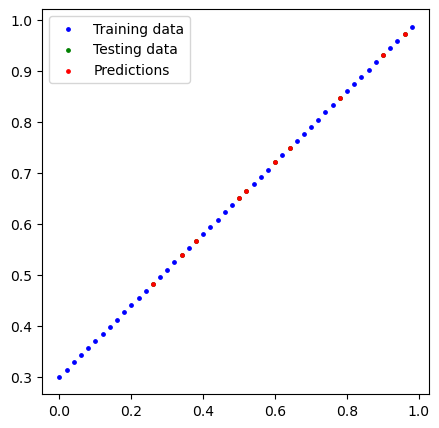

In [112]:
plot_predctions(predctions=y_pred)

In [125]:
import numpy as np 
a = torch.tensor(loss_values).numpy()

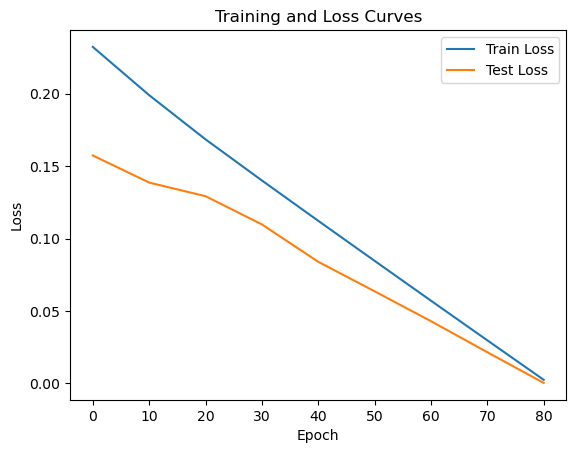

In [127]:
# plot curves 
plt.plot(epoch_nums, torch.tensor(loss_values).numpy(), label="Train Loss")
plt.plot(epoch_nums, torch.tensor(loss_test_values).numpy(), label="Test Loss")
plt.title("Training and Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()